#  ***k-NN and Decision Tree on Wisconsin Cancer Dataset***
## *Class*: COSC528 - Project 3
### *Author*: Ian R. Stewart
### *Due Date*: November 6, 2018

In [27]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
savePath = '/Users/i6o/Research/COSC 528/Project 3/Figures/'

## 1) Data Exploration

In [28]:
# Reading data
features = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df = pd.read_csv('breast-cancer-wisconsin.data',names=features)
'''
------------------------------------------
     Details for DataFrame Features
------------------------------------------
1. Sample code number: id number 
2. Clump Thickness: 1 – 10
3. Uniformity of Cell Size: 1 – 10 
4. Uniformity of Cell Shape: 1 – 10 
5. Marginal Adhesion: 1 – 10
6. Single Epithelial Cell Size: 1 – 10 
7. Bare Nuclei: 1 – 10
8. Bland Chromatin: 1 – 10
9. Normal Nucleoli: 1 – 10
10. Mitoses: 1 – 10
11. Class: (2 for benign, 4 for malignant)
'''
df.head(1)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2


In [29]:
print df.shape
df.dtypes

(699, 11)


Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [30]:
# Dropping rows with '?' values in Bare Nuclei feature.
df['Bare Nuclei'] = df['Bare Nuclei'].astype(str)
count=0;indexes=[]
for i in df['Bare Nuclei']:
    try:
        j = float(i)
    except:
        indexes.append(count)
    count+=1
print len(indexes)
df = df.drop(indexes)
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)
df.dtypes

16


Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [31]:
#sns.pairplot(df[features[1::]],hue='Class',palette='coolwarm')
#plt.savefig(savePath+'full_pairplot.png',dpi=600)

Creating function to split data into training and test sets.

In [32]:
def test_split(data_x,data_y,n):
    '''
    Description: Splits <data> variable into four random 
        parts based on <n> percentage of data for training 
        set.
    
    :param data_x {array} : x data to split,train,predict
    :param data_y {array} : y data to split,train,predict
    :param n      {float} : percentage of data to split
    
    :returns {6}: (x_train,x_test,y_train,y_test) ;     
        x_train = training set for <x> parameter
        x_test  = test set for <x> parameter
        y_train = training set for <y> paramter
        y_test  = test set for <y> parameter
        i_train = indexes of training set split
        i_test  = indexes of test set split
    
    e.g. x_tr,x,y_tr,y,i_tr,i_test=test_split(data,data_to_predict,40)
    '''
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))

Not using *Sample Code No.* in analysis. Using the *Class* feature as the predictor parameter and the other features (minus the *Sample Code No.*) as the estimating parameters. Also, *z*-standardizing data

In [33]:
df_standardized = (df-df.mean())/df.std()
data_x = df_standardized.iloc[:,1:-2]
data_y = df.iloc[:,-1]
print data_x.shape,data_y.shape

(683, 8) (683,)


In [34]:
x_train,x_test,y_train,y_test,train_list,test_check = test_split(data_x,data_y,60)

In [35]:
# Checking split shapes
print 'Training set shapes: \n\t{ Data:%s,\tPredictor:%s }'%(x_train.shape,y_train.shape)
print 'Test set shapes: \n\t{ Data:%s,\tPredictor:%s }'%(x_test.shape,y_test.shape)

Training set shapes: 
	{ Data:(410, 8),	Predictor:(410,) }
Test set shapes: 
	{ Data:(273, 8),	Predictor:(273,) }


## **2.0) Data Analysis**: *k*-**NN**

In [36]:
def test_split(data_x,data_y,n):
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))

In [37]:
x_train,x_test,y_train,y_test,train_list,test_list = test_split(data_x,data_y,50)

In [38]:
from collections import Counter

def getNeighbors(x_training,x_test,y_training,y_test,k=3):
    y_prediction = {}; dist = []
    counter = 0; y_pred = []
    for i in x_test:
        dist = []
        for j in x_training:
            dist.append(sum(np.absolute(i-j)))
        dist_sorted = np.array(sorted(dist))

        closest_indexes = []
        for value in range(k):
            index = np.where(dist==dist_sorted[value])[0][0]
            closest_indexes.append(index)
            
        classes = np.array(y_training)[closest_indexes]
        class_chosen = Counter(classes)
        predicted_class = class_chosen.keys()[np.argmax(class_chosen.values())]
        y_prediction[counter] = predicted_class
        y_pred.append(predicted_class)
        counter+=1
        
    return y_prediction,y_pred

def confusion_matrix(y_predicted,y_true,prints=True):
    TN=0;FN=0;TP=0;FP=0
    for i in range(len(y_predicted)):
        y_pred0 = y_predicted[i]
        y_true0 = y_true[i]
        if y_pred0 == y_true0:
            if y_pred0==4:
                TP+=1
            else:
                TN+=1
        else:
            if y_pred0 == 2:
                FN+=1
            if y_pred0 == 4:
                FP+=1
    if prints:
        print '======== CONFUSION MATRIX ========'
        print '\t\tPREDICTED CLASS\n\t\t---------------\nTRUE CLASS  |  Benign\tMalignant\n  Benign    |\t%i\t%i\n  Malignant |\t%i\t%i'%(TN,FP,FN,TP)
        print '=================================='
    return TN,FN,TP,FP
            
def getMetrics(TN,FN,TP,FP,prints=True):
    TN,FN,TP,FP=float(TN),float(FN),float(TP),float(FP)
    Acc = (TN+TP)/(TN+TP+FN+FP)
    TPR = TP/(TP+FN)
    PPV = TP/(TP+FP)
    TNR = TN/(TN+FP)
    F1  = (2*PPV*TPR)/(PPV+TPR)
    if prints:
        metrics = [Acc,TPR,PPV,TNR,F1]
        labels = ['Acc.','TPR','PPV','TNR','F1']
        print '====== Performance Metrics ======'
        for i in range(len(labels)):
            print '\t%s\t: %.4f'%(labels[i],metrics[i])
        print '================================='
    return Acc,TPR,PPV,TNR,F1

In [39]:
y_dict,y_pred = getNeighbors(x_train,x_test,y_train,y_test)

In [40]:
TN,FN,TP,FP = confusion_matrix(y_pred,y_test)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	217	4
  Malignant |	11	109


In [41]:
metrics= getMetrics(TN,FN,TP,FP)

====== Performance Metrics ======
	Acc.	: 0.9560
	TPR	: 0.9083
	PPV	: 0.9646
	TNR	: 0.9819
	F1	: 0.9356


#### Testing Scikit-Learns KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print confusion_matrix(y_test,pred)
print '\n'
print classification_report(y_test,pred)

[[218   3]
 [ 12 108]]


             precision    recall  f1-score   support

          2       0.95      0.99      0.97       221
          4       0.97      0.90      0.94       120

avg / total       0.96      0.96      0.96       341



Text(0.5,0,u'k (No. of Neighbors)')

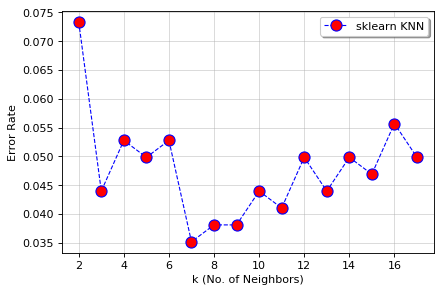

In [44]:
error_rate = []
for i in range(2,18):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(dpi=80)
plt.plot(range(2,18),error_rate,'bo--',linewidth=1,markerfacecolor='red',markersize=10,label='sklearn KNN')
plt.grid(alpha=0.5)
plt.legend(loc='upper right',fancybox=True,shadow=True)
plt.ylabel('Error Rate');plt.xlabel('k (No. of Neighbors)')
#plt.savefig(savePath+'kNN_Elbow_ErrorRate.png',dpi=600)

In [45]:
def test_split(data_x,data_y,n):
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))

In [46]:
x_train,x_test,y_train,y_test,train_list,test_list = test_split(data_x,data_y,50)

In [47]:
from collections import Counter

def getNeighbors(x_training,x_test,y_training,y_test,k=3):
    y_prediction = {}; dist = []
    counter = 0; y_pred = []
    for i in x_test:
        dist = []
        for j in x_training:
            dist.append(sum(np.absolute(i-j)))
        dist_sorted = np.array(sorted(dist))

        closest_indexes = []
        for value in range(k):
            index = np.where(dist==dist_sorted[value])[0][0]
            closest_indexes.append(index)
            
        classes = np.array(y_training)[closest_indexes]
        class_chosen = Counter(classes)
        predicted_class = class_chosen.keys()[np.argmax(class_chosen.values())]
        y_prediction[counter] = predicted_class
        y_pred.append(predicted_class)
        counter+=1
        
    return y_prediction,y_pred

def confusion_matrix(y_predicted,y_true,prints=True):
    TN=0;FN=0;TP=0;FP=0
    for i in range(len(y_predicted)):
        y_pred0 = y_predicted[i]
        y_true0 = y_true[i]
        if y_pred0 == y_true0:
            if y_pred0==4:
                TP+=1
            else:
                TN+=1
        else:
            if y_pred0 == 2:
                FN+=1
            if y_pred0 == 4:
                FP+=1
    if prints:
        print '======== CONFUSION MATRIX ========'
        print '\t\tPREDICTED CLASS\n\t\t---------------\nTRUE CLASS  |  Benign\tMalignant\n  Benign    |\t%i\t%i\n  Malignant |\t%i\t%i'%(TN,FP,FN,TP)
        print '=================================='
    return TN,FN,TP,FP
            
def getMetrics(TN,FN,TP,FP,prints=True):
    TN,FN,TP,FP=float(TN),float(FN),float(TP),float(FP)
    Acc = (TN+TP)/(TN+TP+FN+FP)
    TPR = TP/(TP+FN)
    PPV = TP/(TP+FP)
    TNR = TN/(TN+FP)
    F1  = (2*PPV*TPR)/(PPV+TPR)
    if prints:
        labels = ['Acc.','TPR','PPV','TNR','F1']
        print '====== Performance Metrics ======'
        for i in range(len(labels)):
            print '\t%s\t: %.4f'%(labels[i],metrics[i])
        print '================================='
    return Acc,TPR,PPV,TNR,F1

##### Choosing *k*=8 for optimal nearest-neighbors

In [48]:
y_dict,y_pred = getNeighbors(x_train,x_test,y_train,y_test,k=8)

In [49]:
TN,FN,TP,FP = confusion_matrix(y_pred,y_test)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	208	8
  Malignant |	5	120


In [50]:
metrics= getMetrics(TN,FN,TP,FP)

====== Performance Metrics ======
	Acc.	: 0.9560
	TPR	: 0.9083
	PPV	: 0.9646
	TNR	: 0.9819
	F1	: 0.9356


## **2.1) Data Analysis - Decision Tree Analysis**

In [200]:
class decision_tree(object):
    '''
    Class creates decision tree based on impurity function given
    and splits the data into 'left' and 'right' node and places
    within a dictionary <self.root>, as 'left' and 'right' split
    is easy to visualize and interpret. Print decision_tree.root
    to visualize created decision tree.
    
    To use:
        dt = decision_tree()
        dt.train(training_data_features,training_data_classes)
        class_predictions = dt.prediction(test_data_features)
    '''
    def __init__(self, max_depth,impurity_function='gini'):
        self.max_depth = max_depth
        self.min_num_sample = 50
        self.impurity_function = impurity_function
    
    def gini(self, groups, classes):
        '''
        Gini index impurity measure
        '''
        n_samples = sum([len(group) for group in groups])
        gini = 0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for c in classes:
                score += np.power((group[:,-1] == c).sum()/size,2)
            denom = sum([len(group) for group in groups])
            gini += (1.0-score)*(size/denom)
        return gini
    
    def entropy(self,data_y):
        '''
        Entropy impurity measure using log_base_2
        '''
        elements,counts = np.unique(data_y,return_counts=True)
        en = []
        for i in range(len(elements)):
            en.append( (-counts[i]/sum(counts))*float(np.log2(counts[i]/sum(counts))) )
        return np.sum(en)
    
    def tree_split(self, feat, val, data):
        '''
        Returns the data that splits 'left' and 'right' based on determined split value from *.split
        '''
        # initialize arrays
        data_l = np.array([]).reshape(0,self.data.shape[1])
        data_r = np.array([]).reshape(0,self.data.shape[1])

        for i in self.data:
            if i[feat] <= val:
                data_l = np.vstack((data_l,i))
            if i[feat] > val:
                data_r = np.vstack((data_r,i))
        return data_l, data_r
    
    def split(self, data):
        '''
        Returns dictionary values for splits and branches for current branch split
        '''
        classes = np.unique(self.data[:,-1])
        # initializing to get around referenced before used issue in python
        best_score,best_feat,best_val,best_groups = [1.0,1.0,1.0,[[0.5],[0.5]]]
        for feat in range(self.data.shape[1]-1):
            for i in self.data:
                groups = self.tree_split(feat, i[feat], self.data)
                if self.impurity_function == 'gini':
                    gini = self.gini(groups, classes)
                    if gini < best_score:
                        best_feat = feat ; best_val = i[feat]
                        best_score = gini ; best_groups = groups
                elif self.impurity_function == 'entropy':
                    entropy = self.entropy(classes)
                    if entropy < best_score:
                        best_feat = feat ; best_val = i[feat]
                        best_score = entropy ; best_groups = groups
                    else: best_feat = feat
        output = {};
        output['feat'] = best_feat ; output['val'] = best_val ; output['groups'] = best_groups
        return output
    
    def getClasses(self, group):
        '''
        Returns class values within group; i.e., [2,4] in our case
        '''
        classes, counts = np.unique(group[:,-1],return_counts=True)
        return classes[np.argmax(counts)]
            
    def branch(self, node, depth):
        '''
        splits branches based on created decision into additional depth level
        '''
        left_node, right_node = node['groups']
        del(node['groups'])
        if depth >= self.max_depth:
            node['left'] = self.getClasses(left_node)
            node['right'] = self.getClasses(right_node)
            return
        if len(left_node) <= self.min_num_sample:
            node['left'] = self.getClasses(left_node)
        else:
            node['left'] = self.split(left_node)
            self.branch(node['left'], depth+1)
        if len(right_node) <= self.min_num_sample:
            node['right'] = self.getClasses(right_node)
        else:
            node['right'] = self.split(right_node)
            self.branch(node['right'], depth+1)
    '''
    Creating functions to call and perform DT analysis
        1. decision_tree.train()      : creates decision tree (dictionary) from training dataset
        2. decision_tree.prediction() : returns predicted classifications for test dataset
    '''
    def train(self,data_x,data_y):
        '''
        Train function builds decision tree for given training data.
        '''
        self.data = np.column_stack((data_x,data_y))
        self.root = self.split(self.data)
        self.branch(self.root, 1)
        
    def prediction(self, X_test):
        '''
        prediction function uses created decision tree splits to classify test data.
        '''
        self.y_pred = np.array([])
        for i in X_test:
            self.y_pred = np.append(self.y_pred,self.prediction_sample(self.root,i))
        return self.y_pred
    
    def prediction_sample(self, node, sample):
        '''
        returns classification for current sample in test data based on created decision tree in self.root dictionary
        '''
        if sample[node['feat']] < node['val']:
            if isinstance(node['left'],dict):
                return self.prediction_sample(node['left'],sample)
            else:
                return node['left']
        else:
            if isinstance(node['right'],dict):
                return self.prediction_sample(node['right'],sample)
            else:
                return node['right']


Performing decision tree, where max depth corresponds to depth of tree (8 is chosen as optimal based low error rate and/or high accuracy)

In [ ]:
for i in range(8,9):
    dt = decision_tree(max_depth=i,impurity_function='gini')
    dt.train(x_train,y_train)
    my_pred = dt.prediction(x_test)
    print '------ %i-Depth of Tree ------'%i
    TN,FN,TP,FP = confusion_matrix(my_pred,y_test)
    print ''
    metrics = getMetrics(TN,FN,TP,FP)

Timing prediction function

In [ ]:
# Printing tree
dt.root

In [ ]:
%%time
my_pred = dt.prediction(x_train)

In [167]:
TN,FN,TP,FP = confusion_matrix(my_pred,y_train)
print '\n'
metrics = getMetrics(TN,FN,TP,FP)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	217	6
  Malignant |	1	118


====== Performance Metrics ======
	Acc.	: 0.9677
	TPR	: 1.0000
	PPV	: 0.9160
	TNR	: 0.9502
	F1	: 0.9562


#### ***sklearn for Decision Tree on Data***

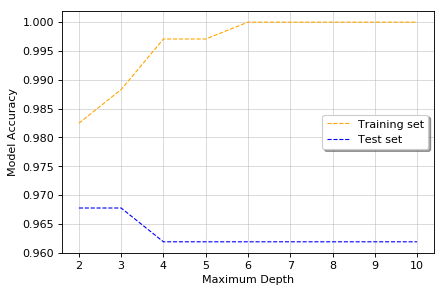

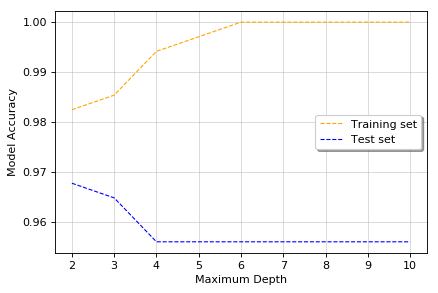

In [156]:
x_train,x_test,y_train,y_test,train_list,test_list = test_split(data_x,data_y,50)
from sklearn.tree import DecisionTreeClassifier
training_accuracy = []
test_accuracy = []

max_dep = [2,3,4,5,6,7,8,9,10]

for md in max_dep:
    tree = DecisionTreeClassifier(criterion='gini',max_depth=md,random_state=0)
    tree.fit(x_train,y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

plt.figure(dpi=80)
plt.plot(max_dep,training_accuracy,'--',color='orange',linewidth=1, label='Training set')
plt.plot(max_dep,test_accuracy,'b--',linewidth=1, label='Test set')
plt.ylabel('Model Accuracy');plt.xlabel('Maximum Depth')
plt.grid(True,alpha=0.5)
plt.legend(loc='best',fancybox=True,shadow=True)
plt.savefig(savePath+'DT_accuracy_gini.png',dpi=400)

training_accuracy = []
test_accuracy = []
for md in max_dep:
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=md,random_state=0)
    tree.fit(x_train,y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

plt.figure(dpi=80)
plt.plot(max_dep,training_accuracy,'--',color='orange',linewidth=1, label='Training set')
plt.plot(max_dep,test_accuracy,'b--',linewidth=1, label='Test set')
plt.ylabel('Model Accuracy');plt.xlabel('Maximum Depth')
plt.grid(True,alpha=0.5)
plt.legend(loc='best',fancybox=True,shadow=True)

In [162]:
print 'No.\tTraining Acc.\tTest Acc.'
for md in [2,3,4,5,6,7,8,9,10,17,33]:
    tree = DecisionTreeClassifier(criterion='gini',max_depth=md,random_state=0)
    tree.fit(x_train,y_train)
    training_accuracy = tree.score(x_train, y_train)
    test_accuracy = tree.score(x_test, y_test)
    print '%i\t%.4f %%\t\t%.4f %%'%(md,training_accuracy,test_accuracy)

No.	Training Acc.	Test Acc.
2	0.9825 %		0.9677 %
3	0.9883 %		0.9677 %
4	0.9971 %		0.9619 %
5	0.9971 %		0.9619 %
6	1.0000 %		0.9619 %
7	1.0000 %		0.9619 %
8	1.0000 %		0.9619 %
9	1.0000 %		0.9619 %
10	1.0000 %		0.9619 %
17	1.0000 %		0.9619 %
33	1.0000 %		0.9619 %


In [121]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
tree.fit(x_train,y_train)
my_pred = tree.predict(x_test)
TN,FN,TP,FP = confusion_matrix(my_pred,y_test)
print '\n'
metrics = getMetrics(TN,FN,TP,FP)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	217	7
  Malignant |	3	114


====== Performance Metrics ======
	Acc.	: 0.9707
	TPR	: 0.9744
	PPV	: 0.9421
	TNR	: 0.9688
	F1	: 0.9580


### **2.2) Data Analysis - Dimensionality Reduction (PCA)**
This function returns the PC matrix with a chosen feature length based on n-number of PCs.

In [138]:
def getValues(n,data0):
    '''
    @param n:           {int}   desired number of components
    @param V_transpose: {array} array matrix from SVD function
    return: original V function specified number of components
    '''
    u,sigma,vt = svd(data0,data0.shape[1])
    sigma_full = np.vstack((np.diag(sigma),np.zeros((len(u)-len(sigma),u.shape[1]))))
    X = np.array(u*sigma)
    X[:,1::]*=-1.

    return np.array(X[:,0:n])

In [456]:
from sklearn.decomposition import PCA
n = 10
pca = PCA(n_components=n)
pca.fit(df_standardized.iloc[:,0:-1].values)
print 'PC No.\tPCA Cumulative'
for i in range(0,n):
    if i == 0:
        print "%i\t%.2f %%"%(i+1,np.sum(pca.explained_variance_ratio_[i]*100))
    else:
        print  "%i\t%.2f %%"%(i+1,np.sum(pca.explained_variance_ratio_[0:i+1]*100))

PC No.	PCA Cumulative
1	59.05 %
2	69.05 %
3	76.80 %
4	82.20 %
5	86.76 %
6	90.56 %
7	93.58 %
8	96.51 %
9	99.12 %
10	100.00 %


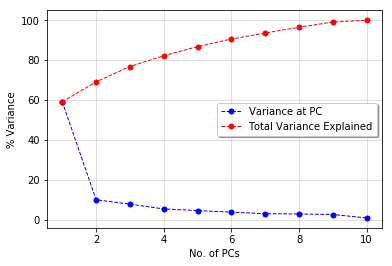

In [130]:
variance = [59.1,10.0,7.8,5.4,4.6,3.8,3.0,2.9,2.6,0.9]
t_v = [59.1,69.1,76.8,82.2,86.8,90.6,93.6,96.5,99.1,100.0]
pcs = range(1,11)
plt.figure()
plt.plot(pcs,variance,'bo--',linewidth=1,markerfacecolor='blue',markersize=5,label='Variance at PC')
plt.plot(pcs,t_v,'ro--',linewidth=1,markerfacecolor='red',markersize=5,label='Total Variance Explained')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True,alpha=0.5)
plt.xlabel('No. of PCs');plt.ylabel('% Variance')
plt.savefig(savePath+'PC_variance.png',dpi=600)

In [141]:
from sklearn.utils.extmath import randomized_svd as svd
data_PC_space = getValues(6,df_standardized.iloc[:,0:-1].values)
data_PC_space.shape

(683, 6)

Creating new split of data for train-test on new PC-space-data

In [144]:
data_x = data_PC_space
data_y = df.iloc[:,-1]
print data_x.shape,data_y.shape
x_train,x_test,y_train,y_test,train_list,test_list = test_split(data_x,data_y,60)

(683, 6) (683,)


##### *k*-NN on new data

In [147]:
y_dict,y_pred = getNeighbors(x_train,x_test,y_train,y_test,k=8)
TN,FN,TP,FP = confusion_matrix(y_pred,y_test)
metrics= getMetrics(TN,FN,TP,FP)

======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	173	5
  Malignant |	6	89
====== Performance Metrics ======
	Acc.	: 0.9451
	TPR	: 0.9891
	PPV	: 0.8667
	TNR	: 0.9227
	F1	: 0.9239


Decision Tree on new data

In [163]:
dt = decision_tree(max_depth=3)
dt.train(x_train,y_train)
my_pred = dt.prediction(x_test)
print '------ %i-Depth of Tree ------'%3
TN,FN,TP,FP = confusion_matrix(my_pred,y_test)
print ''
metrics = getMetrics(TN,FN,TP,FP)

------ 3-Depth of Tree ------
======== CONFUSION MATRIX ========
		PREDICTED CLASS
		---------------
TRUE CLASS  |  Benign	Malignant
  Benign    |	210	11
  Malignant |	0	120

====== Performance Metrics ======
	Acc.	: 0.9634
	TPR	: 1.0000
	PPV	: 0.9048
	TNR	: 0.9438
	F1	: 0.9500
